In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# Importing data

In [4]:
data = pd.read_excel(r"C:\Users\saura\Downloads\plot for project mercury\calibration.xlsx",engine = 'openpyxl')


In [ ]:
data

In [183]:
data2 = data.drop(5,axis = 0)
data2 = data.drop(6,axis = 0)
data2 = data2.drop(['vol3'],axis = 1)
data2 = data2.drop(['vol1'],axis = 1)

xaxis = sum(data['conc'].values)
xaxis2 = sum(data['conc'].values * data['conc'].values)
print(xaxis2)
xaxis2_2 = (xaxis*xaxis)/5
print(xaxis2_2)
sx =  (xaxis2 - xaxis2_2)
print(sx)


yaxis = sum(data['vol'].values)
yaxis2 = sum(data['vol'].values * data['vol'].values)
print(yaxis2)
yaxis2_2 = (yaxis*yaxis)/5 
print(yaxis2_2)
sy = (yaxis2 - yaxis2_2)
print(f"sy {sy}")

xy = sum(data['conc'].values * data['vol'].values)
print(xy)
xysum = (sum(data['conc'].values) *sum(data['vol'].values))/5
print(xysum)
sxy = (xy - xysum)*(xy - xysum)

sq = sx *sy
sxy/sq

203000000
245000000.0
-42000000.0
763866.2737426826
2485.8004483700524
sy 761380.4732943126
4782276.38740837
780398.0457757841


-0.5008143204213169

In [4]:
data = data.drop(7,axis=0)


## Scatter Plot

In [2]:
def scatter_plot(x,y):
    csfont = {'fontname':'Times New Roman'}
    
    plt.title("Calibration plot for Hg with $10^{-4}$M Pb",fontweight='bold',**csfont)
    plt.xlabel('Log of Concentration',fontweight='bold',**csfont)
    plt.ylabel('Emf (mV)',fontweight='bold',**csfont)
    
    return plt.scatter(x,y)

In [7]:
x = data['conc'].values  #Coverting dataframe to numpy array for Hg +Pb
y = data['vol1'].values*1000

In [8]:
x = data['conc'].values  #Coverting dataframe to numpy array for Hg
y = data['vol'].values*1000

ValueError: could not convert string to float: 'slope'

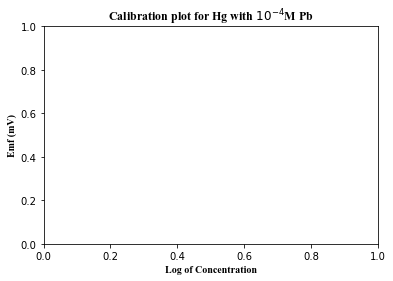

In [11]:
scatter_plot(x,y)

In [12]:
x = data['conc'].values   #data
y = data['vol'].values*1000   
x1 = x[:5]
y1 = y[:5]
frame = pd.DataFrame(y1,columns=["linearity"])
frame

,linearity
0,-311.849
1,-301.146
2,-257.92
3,-144.211
4,-71.734


# Plot

In [3]:
def linear_fitting(x,y,x1,y1):
    plt.figure(figsize=(5,6))

    fig, ax = plt.subplots()
    
    csfont = {'fontname':'Times New Roman'}
    

    plt.title("Calibration plot for Hg with $10^{-4}M$ Pb ",fontweight='bold' ,fontsize = 18,**csfont)  #labeling the plot
    plt.xlabel('Log of Concentration',fontweight='bold' ,fontsize = 18,**csfont)
    plt.ylabel('EMF (mV)',fontweight='bold' ,fontsize = 18,**csfont)
    
    linear_model1 = np.polyfit(x1,y1,1)            #Linear fitting
    print(f'The parameters of the line Red: {linear_model1}')
    print(f'Slope of the curve is:  ',linear_model1[0] )
    linear_model_fn1 = np.poly1d(linear_model1)
    x_lim = np.arange(-8,-3)            #x limit
    
    
    
    linear_model2 = np.polyfit(x,y,1)
    yobs = linear_model2[1] + x*linear_model2[0]  #y observed value from graph

    for i in yobs:      #for calculating standard deviation
        for j in y:
            var = np.sum((j - i)**2)/6
            yer = var ** 0.5
            
    plt.errorbar(x1, y1, yerr = yer,fmt = 'o',color = 'green',    #Error bars
            ecolor = 'blue', elinewidth = 2, capsize=3)
    
#     linearity = data2.corr()['vol']        #For calculating linearity factor
#     print(f'Linearity of the line is:   ',linearity)
    
    plt.xticks(x, weight = 'bold')          #For making x and y ticks bold
    plt.yticks(y, weight = 'bold')
    
    ax.set_yticks(range(-600,600,100))    #range of y axis
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
    
    plt.scatter(x,y)
#     plt.text(-8, 350, "Sensitivity : 63.7mV/p[$Hg^{2+}$]M \n$R^2$ : 0.91952 \nLoD : $10^{-8}$M ~2ppb",
#              bbox = dict(facecolor = 'white', alpha = 1) ,fontsize = 11, **csfont,fontweight='bold')
    
    plt.text(-8, 350, "Sensitivity : 63.26mV/p[$Hg^{2+}$]M \n$R^2$ : 0.93791 \nLoD : $10^{-8}$M ~2ppb",
             bbox = dict(facecolor = 'white', alpha = 1) ,fontsize = 11, **csfont,fontweight='bold')
    
    
    plt.plot(x_lim,linear_model_fn1(x_lim),color="red")
    
    linear_model2=np.polyfit(x2,y2,1)

    print(f'The parameters of the line Black: {linear_model2}')
    y2_line = linear_model2[1]+linear_model2[0]*x2
    plt.plot(x2,y2_line,color="black")
    linear_model2_fn = np.poly1d(linear_model2)
    x2_s = np.arange(-20,0)
    plt.plot (x2_s,linear_model2_fn(x2_s),color="black")
    plt.tight_layout(pad=0.01, w_pad=0.5, h_pad=3.0) 
    
    
    
    return 


In [5]:
x = data['conc'].values   #data
y = data['vol'].values*1000   
x1 = x[:5]
y1 = y[:5]
# frame = pd.DataFrame(y1,columns=["linearity"])
# frame

#Writing potential in millivolt

In [42]:
linearity_factor(y1)

Power_divergenceResult(statistic=-203.112461605237, pvalue=1.0)

In [199]:
xpb = data['conc'].values   #data
ypb = data['vol1'].values*1000  #Writing potential in millivolt

x1pb = xpb[:5]
y1pb = ypb[:5]



The parameters of the line Red: [ 63.26827896 158.93253313]
Slope of the curve is:   63.26827896038675


<Figure size 360x432 with 0 Axes>

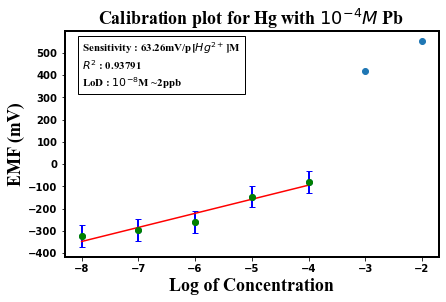

In [202]:
linear_fitting(xpb,ypb,x1pb,y1pb)  #Function calling #Hg _Pb

In [1]:

def parameters(x1,y1):
    
    n = np.size(x1)
    x1_mean = np.mean(x1)
    y1_mean = np.mean(y1)
    x1_mean,y1_mean
  
    Sxy = np.sum(x1*y1)- n*x1_mean*y1_mean
    Sxx = np.sum(x1*x1)-n*x1_mean*x1_mean
  
    b1 = Sxy/Sxx
    b0 = y1_mean-b1*x1_mean
    print('slope b1 is', b1)
    print('intercept b0 is', b0)

    y1_pred = b1 * x1 + b0

    error = y1 - y1_pred
    se = np.sum(error**2)
    print('squared error is', se)
  
    mse = se/n 
    print('mean squared error is', mse)
  
    rmse = np.sqrt(mse)
    print('root mean square error is', rmse)
  
    SSt = np.sum((y1 - y1_mean)**2)
    R2 = 1- (se/SSt)
    print('R square is', R2)
    
    return

In [196]:
npb = np.size(x1pb)

xpb = data['conc'].values   #data
ypb = data['vol1'].values*1000  #Writing potential in millivolt

x1pb = xpb[:5]
y1pb = ypb[:5]

  
x1pb_mean = np.mean(x1pb)
y1pb_mean = np.mean(y1pb)
x1pb_mean,y1pb_mean
  
Sxypb = np.sum(x1pb*y1pb)- n*x1pb_mean*y1pb_mean
Sxxpb = np.sum(x1pb*x1pb)-n*x1pb_mean*x1pb_mean
  
b1pb = Sxypb/Sxxpb
b0pb = y1pb_mean-b1pb*x1pb_mean
print('slope b1 is', b1pb)
print('intercept b0 is', b0pb)

y1pb_pred = b1pb * x1pb + b0pb

errorpb = y1pb - y1pb_pred
sepb = np.sum(errorpb**2)
print('squared error is', sepb)
  
msepb = sepb/npb 
print('mean squared error is', msepb)
  
rmsepb = np.sqrt(msepb)
print('root mean square error is', rmsepb)
  
SStpb = np.sum((y1pb - y1pb_mean)**2)
R2pb = 1- (sepb/SStpb)
print('R square is', R2pb)

slope b1 is 63.26827896038658
intercept b0 is 158.9325331310419
squared error is 2649.906030331812
mean squared error is 529.9812060663623
root mean square error is 23.02132068466886
R square is 0.9379102764547989
